In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content

In [3]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))

In [4]:
#Drop NA from 12
pol_df = pol_df[pol_df.PERCENT_CHANGE_6_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_6_MONTH'])
pol_df.head()

,REP_FULLNAME,REP_STATE,REP_TYPE,REP_PARTY,COMPANY_TICKER,COMPANY_CODE,COMPANY_COUNTRY,COMPANY_NAME,TRANSACTION_TYPE,TRANSACTION_DATE,TRANSACTION_PRICE,SHARE_TYPE,TRANSACTION_SHARE_PRICE,TRANSACTION_SHARE_QUANTITY,SHARE_PRICE_3_MONTH,SHARE_PRICE_6_MONTH,SHARE_PRICE_1_YEAR,PERCENT_CHANGE_3_MONTH,PERCENT_CHANGE_6_MONTH,PERCENT_CHANGE_12_MONTH
0,David Roe,TN,Congress,Republican,AAPL,AAPL US,US,Apple Inc,Buy,12/31/2020,8000,Com NPV,132.69,60,122.15,136.33,NaN,-7.94,2.74,NaN
1,David Roe,TN,Congress,Republican,ACN,ACN US,US,Accenture Plc,Buy,12/31/2020,16001,Com A,261.21,60,276.25,296.43,NaN,5.76,13.48,NaN
2,David Roe,TN,Congress,Republican,ADBE,ADBE US,US,Adobe Inc,Buy,12/31/2020,8000,Com,500.12,14,475.37,590.75,NaN,-4.95,18.12,NaN
3,David Roe,TN,Congress,Republican,AEP,AEP US,US,American Electric Power Co Inc,Buy,12/31/2020,8000,Com,83.27,96,84.70,83.93,NaN,1.72,0.79,NaN
4,David Roe,TN,Congress,Republican,AMGN,AMGN US,US,Amgen Inc,Buy,12/31/2020,8000,Com,229.92,34,248.81,242.46,NaN,8.22,5.45,NaN


In [5]:
#create a dataframe where party = republican
pol_df = pol_df.loc[pol_df["REP_PARTY"] == "Republican"]

In [6]:
#group by % change 12 month
pol_df['PERCENT_CHANGE_6_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_6_MONTH'], downcast="integer")
pol_df['TRANSACTION_SHARE_PRICE'] = pd.to_numeric(pol_df['TRANSACTION_PRICE'], downcast="integer")
pol_df = pol_df.groupby(['REP_FULLNAME']).agg({"TRANSACTION_PRICE": "sum", "PERCENT_CHANGE_6_MONTH":"mean"}).reset_index()
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_6_MONTH
0,Adam Kinzinger,88000,27.023636
1,Addison Mcconnell,24000,35.966667
2,Anthony Gonzales,8000,24.330000
3,Austin Scott,129000,155.713000
4,Brian Mast,211000,67.331250


In [7]:
#create a column titled dollar return that takes the summed transaction costs multipled by the % returns
pol_df["DECIMAL_CHANGE_2020"] = (pol_df.PERCENT_CHANGE_6_MONTH/100)
pol_df["NOMINAL_GAINS_2020"] = pol_df.TRANSACTION_PRICE * pol_df["DECIMAL_CHANGE_2020"]
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_6_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
0,Adam Kinzinger,88000,27.023636,0.270236,23780.8000
1,Addison Mcconnell,24000,35.966667,0.359667,8632.0000
2,Anthony Gonzales,8000,24.330000,0.243300,1946.4000
3,Austin Scott,129000,155.713000,1.557130,200869.7700
4,Brian Mast,211000,67.331250,0.673312,142068.9375


In [8]:
#sort by top 10
pol_df = pol_df.sort_values(by=['NOMINAL_GAINS_2020'], ascending=False)
pol_df = pol_df.head(10)
pol_df

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_6_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
38,Michael Mccaul,75241221,18.557826,0.185578,1.396313e+07
22,Gregory Gianforte,10421510,35.401139,0.354011,3.689333e+06
35,Mark Green,12215025,28.018199,0.280182,3.422430e+06
15,David Roe,10017041,19.204179,0.192042,1.923691e+06
31,Kelly Loeffler,5098001,20.379524,0.203795,1.038948e+06
56,Trey Hollingsworth,2875002,23.286667,0.232867,6.694921e+05
32,Kenneth Conaway,3484012,15.006528,0.150065,5.228292e+05
7,Charles Roberts,2578504,20.078049,0.200780,5.177133e+05
14,David Perdue,2318011,20.759565,0.207596,4.812090e+05
34,Kevin Hern,2337000,17.113830,0.171138,3.999502e+05


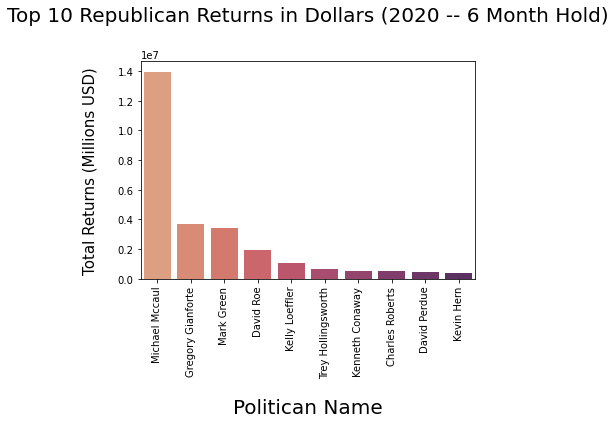

In [9]:
#graph the bar chart
palette = sns.color_palette("flare",10)
ax=sns.barplot(x=pol_df["REP_FULLNAME"],y=pol_df["NOMINAL_GAINS_2020"],palette=palette)
ax.set_xlabel("Politican Name",fontsize=20,labelpad=20)
ax.set_ylabel("Total Returns (Millions USD)",fontsize=15,labelpad=20)
ax.set_title("Top 10 Republican Returns in Dollars (2020 -- 6 Month Hold)", fontsize=20, pad=40)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=10)
plt.savefig('bfb_visualization_4_SIX_REP_bar')